# *Finding the best market(Country) to Advertise in - Analysing the interests, spending and viability of markets(country).*


As a web development and coding e-learning start-up, the organisation is trying to find out the best market to advertise in.
*the organisation has a limited budget and would like to know where it can get the best returns on its ads spent.*
**due to time and cost constraints, the organisation is using an already existing dataset of new coders.**


In [1]:
# Reading in the data
import pandas as pd
fcc = pd.read_csv('2017-FCC-New-Coders-Survey.csv',low_memory = 0) # low_memory false, to silence dtype warning.

# Quick explorationof data
print(fcc.shape)
pd.options.display.max_columns = 150 # To avoid truncated outputs
fcc.head()

(18175, 136)


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,Canada,Canada,software development and IT,NaN,Employed for wages,NaN,NaN,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,15.0,02d9465b21e8bd09374b0066fb2d5614,eb78c1c3ac6cd9052aec557065070fbf,NaN,NaN,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,start your own business,NaN,NaN,NaN,English,married or domestic partnership,150.0,6.0,6f1fbc6b2b,2017-03-09 00:36:22,2017-03-09 00:32:59,2017-03-09 00:59:46,2017-03-09 00:36:26,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working but looking for work,NaN,35000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,0.0,0.0,1.0,NaN,10.0,5bfef9ecb211ec4f518cfc1d2a6f3e0c,21db37adb60cdcafadfa7dca1b13b6b1,NaN,0.0,0.0,0.0,NaN,Within 7 to 12 months,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,work for a nonprofit,1.0,Full-Stack Web Developer,in an office with other developers,English,"single, never married",80.0,6.0,f8f8be6910,2017-03-09 00:37:07,2017-03-09 00:33:26,2017-03-09 00:38:59,2017-03-09 00:37:10,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,1.0,1.0,"some college credit, no degree",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,NaN,

### Questions we are trying to answer with this analysis:
 1. Where are the new coders located 
 2. What locations has the highest density of coders 
 3. How much money are they will to spend on learning. 

In [2]:
# Frequency distribution table for 'JobRoleInterest'

fcc['JobRoleInterest'].value_counts(normalize = True) * 100

Full-Stack Web Developer                                                                                                                                                                                                                                    11.770595
  Front-End Web Developer                                                                                                                                                                                                                                    6.435927
  Data Scientist                                                                                                                                                                                                                                             2.173913
Back-End Web Developer                                                                                                                                                                                                

In [3]:
# Splitting each string in the JobRoleInterest column
interest_no_nulls = fcc['JobRoleInterest'].dropna()
splitted_interest = interest_no_nulls.str.split(',')

# Frequency distribution table for the values representing number of interests/options.
n_of_options = splitted_interest.apply(lambda x: len(x)) # x is a list of job options
n_of_options.value_counts(normalize = True).sort_index() * 100

1     31.650458
2     10.883867
3     15.889588
4     15.217391
5     12.042334
6      6.721968
7      3.861556
8      1.759153
9      0.986842
10     0.471968
11     0.185927
12     0.300343
13     0.028604
Name: JobRoleInterest, dtype: float64

the output above shows that only 31.7 percent of the survey participant had only one interest.
Since the focus of our course is mainly web and mobile development, lets see how many of the respondent are interested in either.

True     86.241419
False    13.758581
Name: JobRoleInterest, dtype: float64


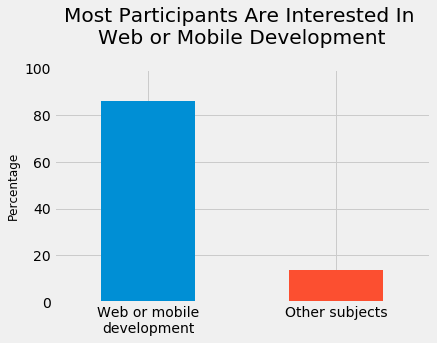

In [4]:
# Frequency table
web_or_mobile = interest_no_nulls.str.contains('Web Developer|Mobile Developer') # Returns an array of boolean values.
freq_table = web_or_mobile.value_counts(normalize = True) * 100
print(freq_table)

# Graph for the frequency table above.
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

freq_table.plot.bar()
plt.title('Most Participants Are Interested In \nWeb or Mobile Development', y= 1.08) # y pads the title upwards
plt.ylabel('Percentage', fontsize = 12)
plt.xticks([0,1],['Web or mobile\ndevelopment', 'Other subjects'], rotation = 0)#the initial xtick labels were True or False.
plt.ylim([0,100])
plt.show()

From our analysis above, it is obvious that 86 percent of the people surveyed are interested in either Web or Mobile development.
This offers us a strong reason to think that this sample is representative for our purpose.

Now we need to find out, what market we can invest money in for advertising. we will like to know:
1. Where are this new coders located
2. What are the locations with the highest number of coders
3. How much money new coders are willing to spend to learn 

In [5]:
# Isolate the participants that answered what role they were intereted in.
fcc_good = fcc[fcc['JobRoleInterest'].notnull()].copy()

# Frequency table with Absolute and Relative frequencies.
abs_freq = fcc_good['CountryLive'].value_counts()
rel_freq = fcc_good['CountryLive'].value_counts(normalize = True) * 100

# Display Frequency table in a more readable format.
pd.DataFrame(data = {'Absolute Frequency': abs_freq,'Relative Frequency':rel_freq})

,Absolute Frequency,Relative Frequency
United States of America,3125,45.700497
India,528,7.721556
United Kingdom,315,4.606610
Canada,260,3.802281
Poland,131,1.915765
Brazil,129,1.886517
Germany,125,1.828020
Australia,112,1.637906
Russia,102,1.491664
Ukraine,89,1.301550


The united states has the largest density of respondent with approximately 46%, followed by india. This information is very useful, but needs further analysis.
it is important to ascertain, if this population are actually willing to pay to learn,as opposed to learning for free.

## Money for learning
the MoneyForLearning column describes how much money (in US dollars)that each respondent has spent so far for learning.
We will create a ne column called spentmonthly, which shows us how much each person average monthly amount spent. This column is derived by dividing the MoneyForLearning column by the MonthsProgramming column. 

In [6]:
# Replacing 0 with 1 to avoid division by 0.
fcc_good['MonthsProgramming'].replace(0,1, inplace = True)

# New column for amount of money spent monthly by each student
fcc_good['spentmonthly'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']
fcc_good['spentmonthly'].isnull().sum()

675

In [7]:
# Keep only rows that not null in the spentmonthly column
fcc_good = fcc_good[fcc_good['spentmonthly'].notnull()]


We want to group the data by country and determine the amount of money spent monthly for each country.

In [8]:
# Remove null values 
fcc_good = fcc_good[fcc_good['CountryLive'].notnull()]

# Frequency table to check if we still have enough data.
fcc_good['CountryLive'].value_counts().head()


United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: CountryLive, dtype: int64

In [9]:
# Mean sum of money spent by students each month.
country_mean = fcc_good.groupby('CountryLive').mean()
country_mean['spentmonthly'][['United States of America','India', 'United Kingdom','Canada']]

CountryLive
United States of America    227.997996
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spentmonthly, dtype: float64

The results seem rather surprising for the Uk an canada, compared to India. Considering economic indicators such as GDP and each countries Currency value compared to the US Dollars, it is expected that the UK and Canada should spent much more than india. this results maybe due to the fact that we dont enogh representative samples for the Uk and Canada. it could also be the result of outliers. it could be that few people in india have spent beyond the ordinary or some respondent in the Uk and Canada have spent too low; thereby dragging the average down.

## Dealing with Outliers
Using boxplots to visualize the spentmonthly for each country.

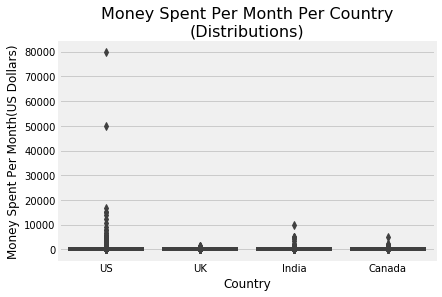

In [10]:
# Isolate only the countries of interest.
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box plots to visualize distributions.
import seaborn as sns
sns.boxplot(y = 'spentmonthly', x = 'CountryLive', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money Spent Per Month(US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US','UK', 'India', 'Canada']) # Avoid Tick Label Overlap
plt.show()

It is difficult from the plot to check if their are issues with the distribution for India and the United Kingdom, but it is quite obvious that there seems to be some extraordinary outliers with the distribution for the United States. while it is not impossible for people to spend 50000 and 80000 dollars monthly on learning, it is highly unlikely and as such this data will be excluded.
All data above 20000 dollars monthly is excluded.

In [11]:
# Isolate only participats with less than 20000 dollars spent monthly.
fcc_good = fcc_good[fcc_good['spentmonthly'] < 20000]

In [12]:
# Recompute mean sum spent monthly for each country
country_mean = fcc_good.groupby('CountryLive').mean()
country_mean['spentmonthly'][['United States of America', 'India', 'United Kingdom', 'Canada']]

CountryLive
United States of America    183.800110
India                       135.100982
United Kingdom               45.534443
Canada                      113.510961
Name: spentmonthly, dtype: float64

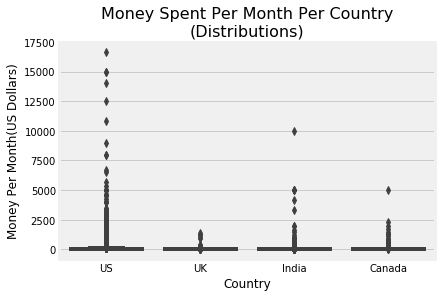

In [13]:
# isolate again country of interest
only_4 = fcc_good[fcc_good['CountryLive'].str.contains('United States of America|India|United Kingdom|Canada')]

# Box Plot to visualize distribution.
sns.boxplot(y = 'spentmonthly', x = 'CountryLive', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('Money Per Month(US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'UK', 'India', 'Canada'])
plt.show()

In [14]:
# Analyse the extreme outliers for india
india_outliers = only_4 [(only_4['CountryLive'] == 'India') & (only_4['spentmonthly'] >= 2500)]
india_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spentmonthly
1728,24.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,A stay-at-home parent or homemaker,NaN,70000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,30.0,d964ec629fd6d85a5bf27f7339f4fa6d,950a8cf9cef1ae6a15da470e572b1b7a,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,1.0,NaN,1.0,work for a startup,1.0,"User Experience Designer, Mobile Developer...",in an office with other developers,Bengali,"single, never married",20000.0,4.0,38d312a990,2017-03-10 10:22:34,2017-03-10 10:17:42,2017-03-10 10:24:38,2017-03-10 10:22:40,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,bachelor's degree,Computer Programming,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5000.000000
1755,20.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,1.0,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,India,India,NaN,NaN,Not working and not looking for work,NaN,100000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,1.0,NaN,0.0,NaN,NaN,10.0,811bf953ef546460f5436fcf2baa532d,81e2a4cab0543e14746c4a20ffdae17c,NaN,0.0,0.0,0.0,NaN,I haven't decided,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,NaN,NaN,NaN,NaN,work for a multinational corporation,1.0,"Information Security, Full-Stack Web Developer...",no preference,Hindi,"single, never married",50000.0,15.0,4611a76b60,2017-03-10 10:48:31,2017-03-10 10:42:29,2017-03-10 10:51:37,2017-03-10 10:48:38,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,1.0,1.0,bachelor's degree,Computer Science,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,N

The data shows that non of the participant took part in a bootcamp. the question asked about the moneyfor learning column was "Apart from tuitor, how much have you spent on learning". its possible that that they didnt understand the question and added tuition fee.So its safer to remove this row.

In [15]:
# Remove India extreme Outliers
only_4 = only_4.drop(india_outliers.index) # Using the row label

In [16]:
# Examine the extreme outliers for the US
us_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['spentmonthly'] >= 6000)]
us_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spentmonthly
718,26.0,1.0,0.0,0.0,The Coding Boot Camp at UCLA Extension,1.0,NaN,more than 1 million,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,15 to 29 minutes,United States of America,United States of America,architecture or physical engineering,NaN,Employed for wages,NaN,50000.0,NaN,NaN,male,NaN,NaN,0.0,0.0,0.0,NaN,0.0,NaN,NaN,35.0,796ae14c2acdee36eebc250a252abdaf,d9e44d73057fa5d322a071adc744bf07,44500.0,0.0,0.0,0.0,1.0,Within the next 6 months,1.0,NaN,NaN,NaN,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a startup,1.0,"User Experience Designer, Full-Stack Web Dev...",in an office with other developers,English,"single, never married",8000.0,1.0,50dab3f716,2017-03-09 21:26:35,2017-03-09 21:21:58,2017-03-09 21:29:10,2017-03-09 21:26:39,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,bachelor's degree,Architecture,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8000.000000
1222,32.0,1.0,0.0,0.0,The Iron Yard,1.0,NaN,"between 100,000 and 1 million",NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,United States of America,United States of America,NaN,NaN,Not working and not looking for work,NaN,50000.0,NaN,NaN,female,NaN,NaN,1.0,0.0,1.0,0.0,0.0,0.0,NaN,50.0,bfabebb4293ac002d26a1397d00c7443,590f0be70e80f1daf5a23eb7f4a72a3d,NaN,0.0,0.0,0.0,NaN,Within the next 6 months,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,work for a nonprofit,1.0,"Front-End Web Developer, Mobile Developer,...",in an office with other developers,English,"single, never married",13000.0,2.0,e512c4bdd0,2017-03-10 02:14:11,2017-03-10 02:10:07,2017-03-10 02:15:32,2017-03-10 02:14:16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they spend $6000 each month, but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In the next code block, we'll remove respondents that:

-Didn't attend bootcamps.
-Had been programming for three months or less when at the time they completed the survey.

In [18]:
# Remove respondent who didnt attend a bootcamp
no_bootcamp = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['spentmonthly'] >= 6000) & (only_4['AttendedBootcamp'] == 0)]

only_4 = only_4.drop(no_bootcamp.index)

# Remove respondent that had been programming for less than three months.
less_than_3_months = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['spentmonthly'] >= 6000) & (only_4['MonthsProgramming'] <= 3)]

only_4 = only_4.drop(less_than_3_months.index)

In [19]:
# Examine extreme outliers for Canada
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') & (only_4['spentmonthly'] >= 4500)]
canada_outliers

,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,CodeEventFCC,CodeEventGameJam,CodeEventGirlDev,CodeEventHackathons,CodeEventMeetup,CodeEventNodeSchool,CodeEventNone,CodeEventOther,CodeEventRailsBridge,CodeEventRailsGirls,CodeEventStartUpWknd,CodeEventWkdBootcamps,CodeEventWomenCode,CodeEventWorkshops,CommuteTime,CountryCitizen,CountryLive,EmploymentField,EmploymentFieldOther,EmploymentStatus,EmploymentStatusOther,ExpectedEarning,FinanciallySupporting,FirstDevJob,Gender,GenderOther,HasChildren,HasDebt,HasFinancialDependents,HasHighSpdInternet,HasHomeMortgage,HasServedInMilitary,HasStudentDebt,HomeMortgageOwe,HoursLearning,ID.x,ID.y,Income,IsEthnicMinority,IsReceiveDisabilitiesBenefits,IsSoftwareDev,IsUnderEmployed,JobApplyWhen,JobInterestBackEnd,JobInterestDataEngr,JobInterestDataSci,JobInterestDevOps,JobInterestFrontEnd,JobInterestFullStack,JobInterestGameDev,JobInterestInfoSec,JobInterestMobile,JobInterestOther,JobInterestProjMngr,JobInterestQAEngr,JobInterestUX,JobPref,JobRelocateYesNo,JobRoleInterest,JobWherePref,LanguageAtHome,MaritalStatus,MoneyForLearning,MonthsProgramming,NetworkID,Part1EndTime,Part1StartTime,Part2EndTime,Part2StartTime,PodcastChangeLog,PodcastCodeNewbie,PodcastCodePen,PodcastDevTea,PodcastDotNET,PodcastGiantRobots,PodcastJSAir,PodcastJSJabber,PodcastNone,PodcastOther,PodcastProgThrowdown,PodcastRubyRogues,PodcastSEDaily,PodcastSERadio,PodcastShopTalk,PodcastTalkPython,PodcastTheWebAhead,ResourceCodecademy,ResourceCodeWars,ResourceCoursera,ResourceCSS,ResourceEdX,ResourceEgghead,ResourceFCC,ResourceHackerRank,ResourceKA,ResourceLynda,ResourceMDN,ResourceOdinProj,ResourceOther,ResourcePluralSight,ResourceSkillcrush,ResourceSO,ResourceTreehouse,ResourceUdacity,ResourceUdemy,ResourceW3S,SchoolDegree,SchoolMajor,StudentDebtOwe,YouTubeCodeCourse,YouTubeCodingTrain,YouTubeCodingTut360,YouTubeComputerphile,YouTubeDerekBanas,YouTubeDevTips,YouTubeEngineeredTruth,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston,spentmonthly
13659,24.0,1.0,0.0,0.0,Bloc.io,1.0,NaN,more than 1 million,1.0,NaN,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,30 to 44 minutes,Canada,Canada,finance,NaN,Employed for wages,NaN,60000.0,NaN,NaN,male,NaN,NaN,1.0,0.0,1.0,1.0,0.0,0.0,250000.0,10.0,739b584aef0541450c1f713b82025181,28381a455ab25cc2a118d78af44d8749,140000.0,1.0,1.0,0.0,0.0,I haven't decided,1.0,NaN,1.0,NaN,1.0,1.0,1.0,NaN,1.0,NaN,1.0,NaN,1.0,work for a multinational corporation,NaN,"Mobile Developer, Full-Stack Web Developer, ...",from home,Yue (Cantonese) Chinese,"single, never married",10000.0,2.0,41c26f2932,2017-03-25 23:23:03,2017-03-25 23:20:33,2017-03-25 23:24:34,2017-03-25 23:23:06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.0,1.0,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,1.0,bachelor's degree,Finance,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,5000.0


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [22]:
# Remove extreme outlier for Canada
only_4 = only_4.drop(canada_outliers.index)

Let's recompute the mean values and generate the final box plots

In [23]:
# Recompute mean sum of money spent by students per month.
only_4.groupby('CountryLive').mean()['spentmonthly']

CountryLive
Canada                       93.065400
India                        65.758763
United Kingdom               45.534443
United States of America    142.654608
Name: spentmonthly, dtype: float64

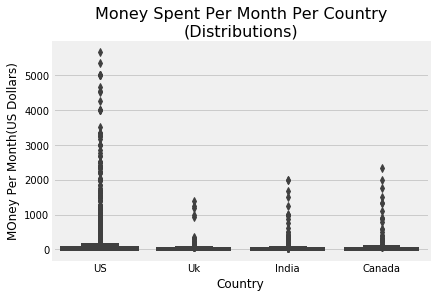

In [24]:
# Visualize the distribution again
sns.boxplot(y='spentmonthly', x = 'CountryLive', data = only_4)
plt.title('Money Spent Per Month Per Country\n(Distributions)', fontsize = 16)
plt.ylabel('MOney Per Month(US Dollars)')
plt.xlabel('Country')
plt.xticks(range(4), ['US', 'Uk', 'India', 'Canada'])
plt.show()

## Choosing the Two Best Markets
Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month (roughly $143).

We sell subscriptions at a price of $59 per month, and Canada seems to be the best second choice because people there are willing to pay roughly $93 per month, compared to India ($66) and the United Kingdom ($45).

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

$59 doesn't seem like an expensive sum for people in India since they spend on average \$66 each month.
We have almost twice as more potential customers in India than we have in Canada:

In [25]:
# Frequency table for the 'CountryLive' column
only_4['CountryLive'].value_counts(normalize = True) * 100

United States of America    74.967908
India                       11.732991
United Kingdom               7.163030
Canada                       6.136072
Name: CountryLive, dtype: float64

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:

60% for the US, 25% for India, 15% for Canada.
50% for the US, 30% for India, 20% for Canada; etc.
Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:

70% for the US, and 30% for India.
65% for the US, and 35% for Canada; etc.
Advertise only in the US.

At this point, it's probably best to send our analysis to the marketing team and let them use their domain knowledge to decide. They might want to do some extra surveys in India and Canada and then get back to us for analyzing the new survey data.

## Conclusion
In this project, we analyzed survey data from new coders to find the best two markets to advertise in. The only solid conclusion we reached is that the US would be a good market to advertise in.

For the second best market, it wasn't clear-cut what to choose between India and Canada. We decided to send the results to the marketing team so they can use their domain knowledge to take the best decision.

